Name : Silva G.B.N.M. <br>
Index No : 190592X

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from plyfile import PlyData,PlyElement

Q1

In [3]:
pcd = PlyData.read(r'images/airplane.ply')
assert pcd is not None

points = np.concatenate((pcd['vertex']['x'].reshape(1,-1),pcd['vertex']['y'].reshape(1,-1),pcd['vertex']['z'].reshape(1,-1)),axis = 0)
points = points - np.mean(points,axis = 1).reshape(3,1)

Text(0.5, 0, 'z')

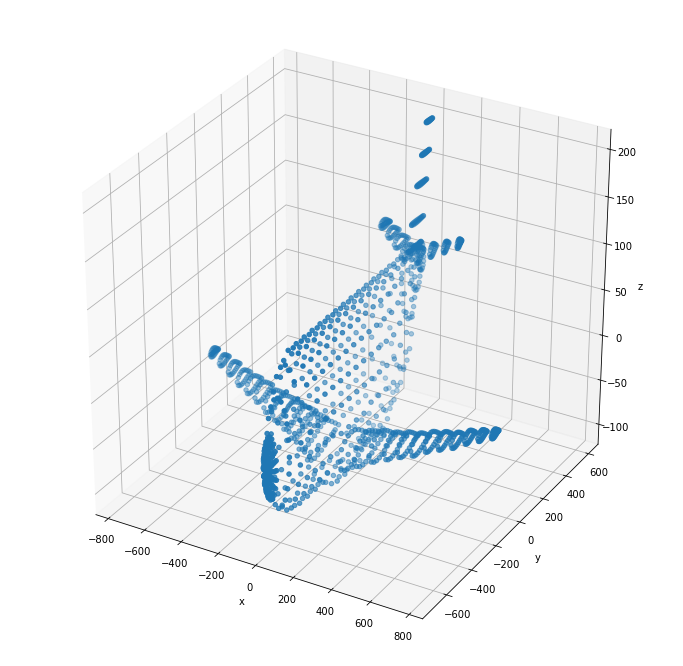

In [4]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(points[0,:], points[1,:], points[2,:])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

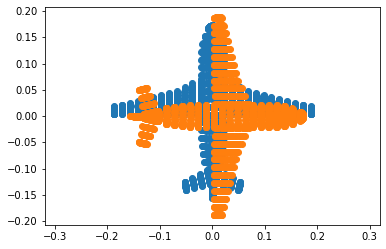

In [7]:
ones = np.ones((1,points.shape[1]))
X = np.concatenate((points,ones),axis = 0)

R = np.array([[1,0,0],[0,1,0],[0,0,1]])
K = np.array([[1,0,0],[0,1,0],[0,0,1]])
t = np.array([[0],[0],[-4000]])

P1 = K @ np.concatenate((R,t),axis =1)

R = np.array([[0,1,0],[1,0,0],[0,0,1]])
K = np.array([[1,0,0],[0,1,0],[0,0,1]])
t = np.array([[0],[0],[-4000]])

P2 = K @ np.concatenate((R,t),axis=1)
X1 = P1 @ X
X1 = X1/X1[2,:]
X2 = P2 @ X
X2 = X2/X2[2,:]

fig,ax = plt.subplots(1,1,sharex=True,sharey=True)
ax.scatter(X1[0,:],X1[1,:])
ax.scatter(X2[0,:],X2[1,:])
ax.axis('equal')
plt.show()